In [1]:
!pip install selenium

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import bs4
import selenium
import requests

In [4]:
myntra_url = "https://www.myntra.com/under-599-store"
page = requests.get(myntra_url).text

### MYNTRA

In [5]:
type(page)
bs_obj =bs4.BeautifulSoup(page,'html.parser')
type(bs_obj)

bs4.BeautifulSoup

In [6]:
bs_obj.findAll('li',{'class':'product-base'})

[]

In [8]:
# FOr static websites Beautiful soup , for dynamic websites : Selenimum 


In [7]:
import os
os.getcwd()

'C:\\Users\\Halappa Guruppanavar\\Desktop\\EDA Codes\\Kathirmani'

In [8]:
from selenium import webdriver

In [9]:
browser = webdriver.Chrome('chromedriver.exe')

In [10]:
browser.get(myntra_url)

In [13]:
browser.find_elements_by_css_selector('li.product-base')

[<selenium.webdriver.remote.webelement.WebElement (session="e86a3f9e466bf95ae4d7ead917956e20", element="0.77244078221659-1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e86a3f9e466bf95ae4d7ead917956e20", element="0.77244078221659-2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e86a3f9e466bf95ae4d7ead917956e20", element="0.77244078221659-3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e86a3f9e466bf95ae4d7ead917956e20", element="0.77244078221659-4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e86a3f9e466bf95ae4d7ead917956e20", element="0.77244078221659-5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e86a3f9e466bf95ae4d7ead917956e20", element="0.77244078221659-6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e86a3f9e466bf95ae4d7ead917956e20", element="0.77244078221659-7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e86a3f9e466bf95ae4d7ead917956e20", element="0.77244

In [14]:
# css_element output 1st matchonly elements : returns all match and returns as a list
products = browser.find_elements_by_css_selector('li.product-base')

In [15]:
len(products)

48

In [16]:
for item in products:
    print(item)

<selenium.webdriver.remote.webelement.WebElement (session="e86a3f9e466bf95ae4d7ead917956e20", element="0.77244078221659-1")>
<selenium.webdriver.remote.webelement.WebElement (session="e86a3f9e466bf95ae4d7ead917956e20", element="0.77244078221659-2")>
<selenium.webdriver.remote.webelement.WebElement (session="e86a3f9e466bf95ae4d7ead917956e20", element="0.77244078221659-3")>
<selenium.webdriver.remote.webelement.WebElement (session="e86a3f9e466bf95ae4d7ead917956e20", element="0.77244078221659-4")>
<selenium.webdriver.remote.webelement.WebElement (session="e86a3f9e466bf95ae4d7ead917956e20", element="0.77244078221659-5")>
<selenium.webdriver.remote.webelement.WebElement (session="e86a3f9e466bf95ae4d7ead917956e20", element="0.77244078221659-6")>
<selenium.webdriver.remote.webelement.WebElement (session="e86a3f9e466bf95ae4d7ead917956e20", element="0.77244078221659-7")>
<selenium.webdriver.remote.webelement.WebElement (session="e86a3f9e466bf95ae4d7ead917956e20", element="0.77244078221659-8")>


In [17]:
# use element cuz a brand has one name

for item in products:
    name = item.find_element_by_css_selector('div.product-brand')
    name = name.get_attribute('innerHTML')
    print(name)

# when text content between opening and closing tag use : get_attribute('innerHTML)

Libas
Vishudh
Sangria
Columbus
Maniac
Jompers
Libas
La Firangi
Libas
The Vanca
Difference of Opinion
Tulsattva
RARE
Jompers
Jaipur Kurti
boAt
Maniac
Roadster
Zima Leto
2GO
Roadster
Harpa
AKS
Jashn
Maybelline
Lakme
Azira
Mayra
Veni Vidi Vici
Roadster
Alba
Tulsattva
MAKE UP FOR LIFE
PrettyCat
Jaipur Kurti
Ishin
Columbus
Libas
Libas
Jaipur Kurti
Maybelline
The Vanca
RARE
Soch
AKS
ZIYAA
Purple Feather
Mayra


In [38]:
df_products = pd.DataFrame(columns =['name','description','price','discount'])
for item in products:
    name = item.find_element_by_css_selector('div.product-brand')
    name = name.get_attribute('innerHTML')
    
    desc = item.find_element_by_css_selector('h4.product-product')
    desc = desc.get_attribute('innerHTML')
    
    discount = item.find_element_by_css_selector('span.product-discountPercentage') # <span class="product-discountPercentage">(55% OFF)</span>
    discount = discount.get_attribute('innerHTML')
    
    #print(name,'|',desc)
    #print(name,'|',discount)
    
    price_parent = item.find_element_by_css_selector('div.product-price') # use div (parent) insteasd of the particular class
    price_child = (price_parent.find_element_by_css_selector('span')) # not using innerhtml because we are accesing parent class not particular class
    
    try:
        price = price_child.find_element_by_css_selector('span.product-discountedPrice')
        price = price.get_attribute('innerHTML')
    except:
        price = price_child.get_attribute('innerHTML')
# Extract all and store in dictionary
    curr_row = {
        'name' :name,
        'description':desc,
        'price':price,
        'discount':discount
    }
    df_products = df_products.append(curr_row,ignore_index = True)
df_products


,name,description,price,discount
0,Libas,Libas Women Mustard Yellow &amp; Blue Printed ...,<!-- react-text: 440 -->Rs. <!-- /react-text -...,(55% OFF)
1,Vishudh,Vishudh Women Black Printed A-Line Kurta,<!-- react-text: 475 -->Rs. <!-- /react-text -...,(50% OFF)
2,Sangria,Printed Round Neck Straight Fit Kurta With 3/4...,<!-- react-text: 509 -->Rs. <!-- /react-text -...,(30% OFF)
3,Columbus,Columbus Men Navy Blue Running Shoes,<!-- react-text: 542 -->Rs. <!-- /react-text -...,
4,Maniac,Maniac Men Navy Blue Checked Round Neck T-shirt,<!-- react-text: 573 -->Rs. <!-- /react-text -...,(65% OFF)
5,Jompers,Jompers Women Red &amp; Beige Printed A-Line K...,<!-- react-text: 606 -->Rs. <!-- /react-text -...,(50% OFF)
6,Libas,Libas Women Maroon Woven Design Pathani Kurta,<!-- react-text: 640 -->Rs. <!-- /react-text -...,(55% OFF)
7,La Firangi,La Firangi Women White Printed Anarkali Kurta,<!-- react-text: 675 -->Rs. <!-- /react-text -...,(65% OFF)
8,Libas,Libas Women Pink Solid Straight Kurta,<!-- react-text: 710 -->Rs. <!-- /react-text -...,(37% OFF)
9,The Vanca,The Vanca Women Peach Solid Regular Top,<!-- react-text: 745 -->Rs. <!-- /react-text -...,(50% OFF)


In [39]:
df_products.to_csv('myntra_products.csv',index = False) # without index

### NAUKRI WEBSITE

In [8]:
browser = webdriver.Chrome('chromedriver.exe')

In [9]:
browser.get('https://www.naukri.com/data-science-jobs')

In [10]:
jobs = browser.find_elements_by_css_selector('div.row[type = "tuple"]') # class -> . , id -> # ,if not use div.row[type = 'tuple]
print(len(jobs))

50


In [11]:
for job in jobs:
    job_title = job.find_element_by_css_selector('li.desig')
    job_title = job_title.get_attribute('title') # HEre not using innerHTML because we are taking only the title
    #print(job_title) # get job title
    
    company = job.find_element_by_css_selector('span.org')
    company = company.get_attribute('innerHTML')
    print(company) # to Get company names

EAGE TECHNOLOGIES (INDIA) PRIVATE LIMITED
Change Leaders
COMPUTER POWER GROUP PRIVATE LIMITED
Sandisk India Device Design Centre Pvt Ltd
Advanto Software
ZS Associates {India} Pvt Ltd
Netcore Solutions Pvt Ltd
2Coms Consulting Pvt Ltd.
COMPUTER POWER GROUP PRIVATE LIMITED
Brainsearch Consulting Pvt Ltd.Â&nbsp;
VSS INNOVATIVE TECHNOLOGIES
SLA Consultants India
Covalent Industries Private Limited
MNC TRINING COMPANY
MNC
<font class="hlite">Data</font> <font class="hlite">Science</font> / Machine LearningTrainer
Cvent India Pvt. Ltd.
Staffio HR
Rinalytics Advisors
Resource Weaver
Peopleton Solutions
Walking Tree Consultancy Services
MARSIAN Technologies LLP
BlackRock Services India Pvt. Ltd.
Startup - Involvio
IRIS SOFTWARE Inc
K V Computer Home Private limited
AbsolutData Research  Analytics Solutions Pvt. Lt
Piford Technologies (P) Ltd
Hexaware Technologies Ltd.
Peers Technologies (P) Ltd.
SPI TECHNOLOGIES INDIA PRIVATE LIMITED
Dimensions HRD Consultants
Vidooly - Startup
Matrimony.com 

In [61]:
# Create a function so that we can call it every time
def get_info(job,selector,attribute):
    try:
        tag = job.find_element_by_css_selector(selector)
        tag = tag.get_attribute(attribute)
    except:
        tag = None
    return tag

df_jobs = pd.DataFrame(columns = ['title','company','salary','date','location','experience','description','skills','URL'])

for job in jobs:
    job_title = get_info(job,'li.desig','title')
    company = get_info(job,'span.org','innerHTML')
    salary = get_info(job,'span.salary','innerHTML')
    date = get_info(job,'span.date','innerHTML')
    
    parent_location = job.find_element_by_css_selector('span.loc')
    location = get_info(parent_location,'span','innerHTML')
    
    experience = get_info(job,'span.exp','innerHTML')
    #print(experience)
    skills = get_info(job,'span.skill','innerHTML')
    description = get_info(job,'span.desc','innerHTML') # For getting description
    url = get_info(job,'a.content','href') # for getting URL
    naukri = { 'title':job_title,'company':company,'salary':salary,'date':date,'location':location,'experience':experience,
             'description':description,'skills':skills,'URL':url
             }
    df_jobs =df_jobs.append(naukri,ignore_index = True)
df_jobs

,title,company,salary,date,location,experience,description,skills,URL
0,Data Science and Analytics Engineer at Singapore,EAGE TECHNOLOGIES (INDIA) PRIVATE LIMITED,"<em></em> 35,00,000 - 50,00,000 P.A.",1 day ago,Singapore,<em></em>3-8 yrs,"Knowledge and working experience in workflow, ...","Deep Learning, NLP, Spark, Information Retriev...",https://www.naukri.com/job-listings-Data-Scien...
1,Manager - Operations - Data Science Course - E...,Change Leaders,<em></em> Not disclosed,1 day ago,Bengaluru,<em></em>3-6 yrs,"- Ownership of Program Office (<font class=""hl...","Operations, Manager - Operations, Project Mana...",https://www.naukri.com/job-listings-Manager-Op...
2,ETL Lead & Data Science,COMPUTER POWER GROUP PRIVATE LIMITED,<em></em> Not disclosed,1 day ago,"Mumbai, Bengaluru, Chennai, Pune, Noida",<em></em>7-10 yrs,Industry experience in building and operationa...,"SQL, <font class=""hlite"">Data</font> Analysis,...",https://www.naukri.com/job-listings-ETL-Lead-D...
3,"Senior Manager, Data Science",Sandisk India Device Design Centre Pvt Ltd,<em></em> Not disclosed,1 day ago,Bengaluru,<em></em>3-5 yrs,None,"Report Generation, Deep Learning, <font class=...",https://www.naukri.com/job-listings-Senior-Man...
4,Need Technical Trainer Machine Learning/data S...,Advanto Software,"<em></em> 3,00,000 - 8,00,000 P.A.",1 day ago,Pune(Pune Nashik Highway),<em></em>1-6 yrs,None,"<font class=""hlite"">data</font> <font class=""h...",https://www.naukri.com/job-listings-Need-Techn...
5,Data Science Associate Consultant,ZS Associates {India} Pvt Ltd,<em></em> Not disclosed,1 day ago,Delhi,<em></em>3-5 yrs,None,"Consulting, <font class=""hlite"">Data</font> mi...",https://www.naukri.com/job-listings-Data-Scien...
6,Data Science,Netcore Solutions Pvt Ltd,"<em></em> 2,00,000 - 7,00,000 P.A.",6 days ago,Mumbai,<em></em>2-4 yrs,"At least 2 year of experience in <font class=""...","Algorithms, Machine Learning, Python, Java, <f...",https://www.naukri.com/job-listings-Data-Scien...
7,Urgent Opening For DATA Science,2Coms Consulting Pvt Ltd.,"<em></em> 7,00,000 - 14,00,000 P.A.",3 days ago,Bengaluru,<em></em>4-9 yrs,"Solid knowledge in statistics and mathematics,...","Machine Learning, <font class=""hlite"">Data</fo...",https://www.naukri.com/job-listings-Urgent-Ope...
8,ETL Lead & Data Science,COMPUTER POWER GROUP PRIVATE LIMITED,"<em></em> 10,00,000 - 15,00,000 P.A.",6 days ago,"Chennai, Bengaluru, Mumbai, Pune, Noida",<em></em>7-10 yrs,Industry experience in building and operationa...,"SQL, <font class=""hlite"">Data</font> Analysis,...",https://www.naukri.com/job-listings-ETL-Lead-D...
9,Specialist - Data Science,Brainsearch Consulting Pvt Ltd.Â&nbsp;,<em></em> Not disclosed,6 days ago,"Delhi NCR, Bengaluru, Gurgaon",<em></em>7-12 yrs,"- Experience with one or more <font class=""hli...","Specialist - <font class=""hlite"">Data</font> <...",https://www.naukri.com/job-listings-Specialist...


In [16]:
### Seeing only for salary 
df_jobs['salary'].head(10)

0    <em></em>    35,00,000 - 50,00,000 P.A.  
1                    <em></em>  Not disclosed 
2                    <em></em>  Not disclosed 
3                    <em></em>  Not disclosed 
4      <em></em>    3,00,000 - 8,00,000 P.A.  
5                    <em></em>  Not disclosed 
6      <em></em>    2,00,000 - 7,00,000 P.A.  
7     <em></em>    7,00,000 - 14,00,000 P.A.  
8    <em></em>    10,00,000 - 15,00,000 P.A.  
9                    <em></em>  Not disclosed 
Name: salary, dtype: object

In [17]:
df_jobs.to_csv('naukri.csv',index = False) # without index

In [18]:
### Regex to remove aplabets
df_jobs['salary'].str.replace('P.A.','-').head(5)

0    <em></em>    35,00,000 - 50,00,000 -  
1                 <em></em>  Not disclosed 
2                 <em></em>  Not disclosed 
3                 <em></em>  Not disclosed 
4      <em></em>    3,00,000 - 8,00,000 -  
Name: salary, dtype: object

In [19]:
### Regex to remove numbers
df_jobs['salary'].str.replace('[0-9]','').head(5)

0    <em></em>    ,, - ,, P.A.  
1      <em></em>  Not disclosed 
2      <em></em>  Not disclosed 
3      <em></em>  Not disclosed 
4    <em></em>    ,, - ,, P.A.  
Name: salary, dtype: object

In [26]:
### Retain aplhabets and remove everything else
df_jobs['salary_regex'] = df_jobs['salary'].str.replace('[^0-9-]','')
df_jobs[['salary', 'salary_regex']].head()

,salary,salary_regex
0,"<em></em> 35,00,000 - 50,00,000 P.A.",3500000-5000000
1,<em></em> Not disclosed,
2,<em></em> Not disclosed,
3,<em></em> Not disclosed,
4,"<em></em> 3,00,000 - 8,00,000 P.A.",300000-800000


In [24]:
x = '20000-70000'
x.split('-')

['20000', '70000']

In [44]:
def get_salary(value, type_salary):
    if type_salary == 'low':
        try:
            return float(value.split('-')[0])
        except : return 0
    else:
        try:
            return float(value.split('-')[1])
        except : return 0
print(get_salary(x, 'low'))
print(get_salary(x,'high'))
print(get_salary('500000', 'high'))

20000.0
70000.0
0


In [42]:
df_jobs['slow'] = df_jobs['salary_regex'].apply(lambda v: get_salary(v, 'low'))
df_jobs['shigh'] = df_jobs['salary_regex'].apply(lambda v: get_salary(v, 'high'))
df_jobs[['salary', 'slow', 'shigh']].head()

,salary,slow,shigh
0,"<em></em> 35,00,000 - 50,00,000 P.A.",3500000.0,5000000.0
1,<em></em> Not disclosed,0.0,0.0
2,<em></em> Not disclosed,0.0,0.0
3,<em></em> Not disclosed,0.0,0.0
4,"<em></em> 3,00,000 - 8,00,000 P.A.",300000.0,800000.0


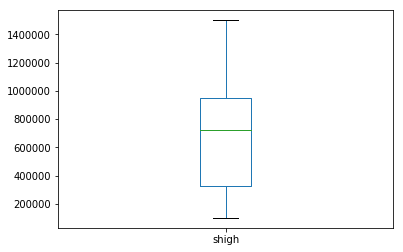

In [55]:
%matplotlib inline
subset = df_jobs[(df_jobs['shigh']!=0) & (df_jobs['slow']<50000000)]
subset['shigh'].plot.box(showfliers=False)